<a href="https://colab.research.google.com/github/Mugdhi15/EDA-on-Titanic-Dataset/blob/main/EDA_on_Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries and Load Dataset**

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the Titanic dataset
df = sns.load_dataset('titanic')

# Preview the first few rows
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# Dataset overview
print("Shape of the dataset:", df.shape)
print("\nColumns in the dataset:\n", df.columns)

Shape of the dataset: (891, 15)

Columns in the dataset:
 Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [4]:
#Summary Statistics
df.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#check for nulls
df.info()

# Count missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
print(missing_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
             Missing Values  Percentage
adult_male                0    0.000000

**Missing Value Analysis**

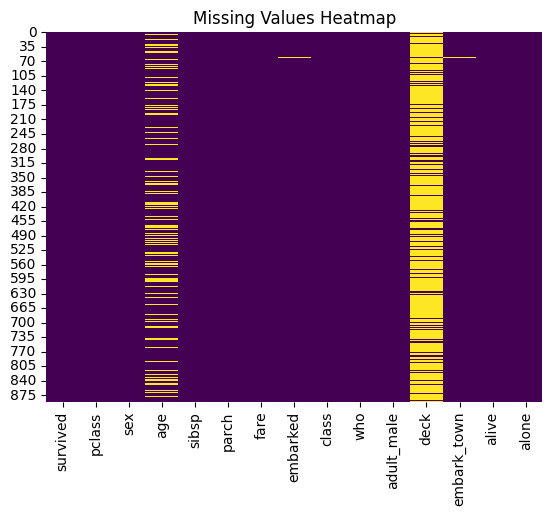

In [6]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

Key Findings:

*   Age: ~19.8% missing
*   Cabin: ~77% missing — likely not useful without heavy processing
*   Embarked: Few missing values (can be imputed)

In [10]:
print(df.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [12]:
# Import libraries
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

titanic_data_filled = df.copy()

# Step 1: Encode relevant categorical variables for imputation
label_encoders = {}
for col in ['sex', 'embarked']:
    if titanic_data_filled[col].dtype == 'object':
        le = LabelEncoder()
        titanic_data_filled[col] = titanic_data_filled[col].astype(str)
        titanic_data_filled[col] = le.fit_transform(titanic_data_filled[col])
        label_encoders[col] = le

# Step 2: Identify numerical and categorical columns
numerical_cols = titanic_data_filled.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(exclude=['number']).columns

# Step 3: Use IterativeImputer with RandomForest for numerical missing values
imputer = IterativeImputer(estimator=RandomForestRegressor(), random_state=42)
titanic_data_filled[numerical_cols] = imputer.fit_transform(titanic_data_filled[numerical_cols])

# Step 4: Fill categorical values with mode (if any missing left)
for col in categorical_cols:
    if titanic_data_filled[col].isnull().sum() > 0:
        titanic_data_filled[col] = titanic_data_filled[col].fillna(titanic_data_filled[col].mode()[0])

# Step 5: Reverse label encoding to restore original category names
for col, le in label_encoders.items():
    titanic_data_filled[col] = le.inverse_transform(titanic_data_filled[col].astype(int))

# Step 6: Confirm all missing values are handled
print("\nMissing values after ML-based imputation:\n")
print(titanic_data_filled.isnull().sum())



✅ Missing values after ML-based imputation:

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


**Univariate Analysis**

In [13]:
# Set plot style
sns.set(style="whitegrid")

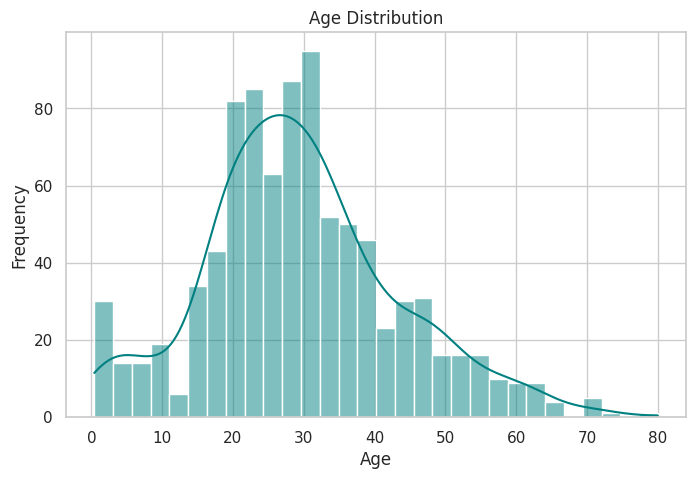

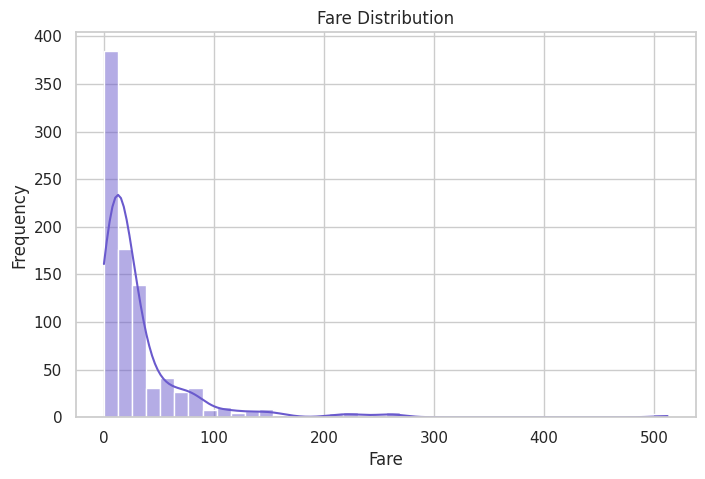

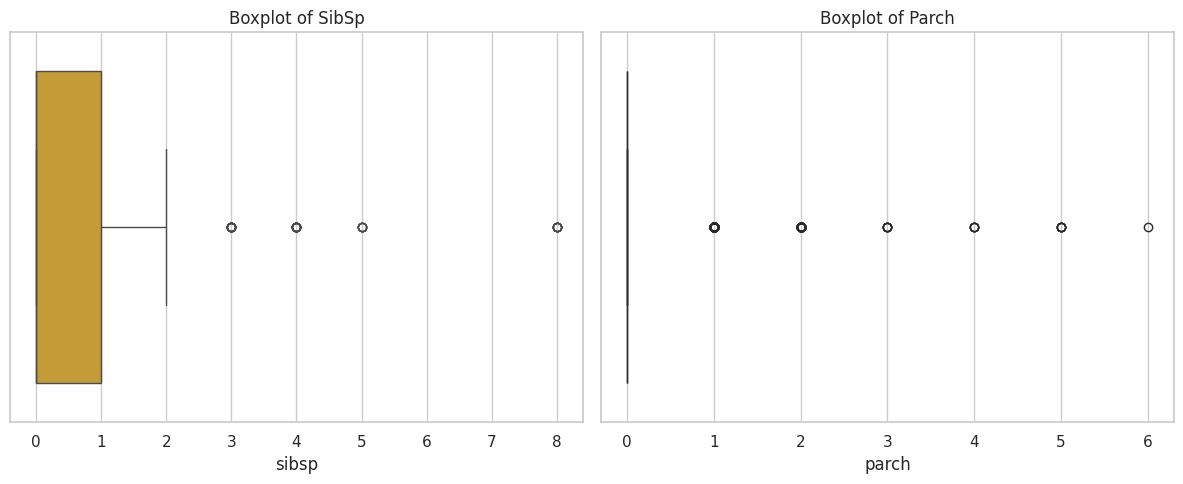

In [14]:
# 1. Numerical Features

#Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(titanic_data_filled['age'], bins=30, kde=True, color='teal')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Fare Distribution
plt.figure(figsize=(8, 5))
sns.histplot(titanic_data_filled['fare'], bins=40, kde=True, color='slateblue')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

#SibSp & Parch (Boxplots to show outliers)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=titanic_data_filled['sibsp'], color='goldenrod')
plt.title('Boxplot of SibSp')

plt.subplot(1, 2, 2)
sns.boxplot(x=titanic_data_filled['parch'], color='darkcyan')
plt.title('Boxplot of Parch')

plt.tight_layout()
plt.show()


<ipython-input-15-386466886>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=titanic_data_filled, palette='pastel')


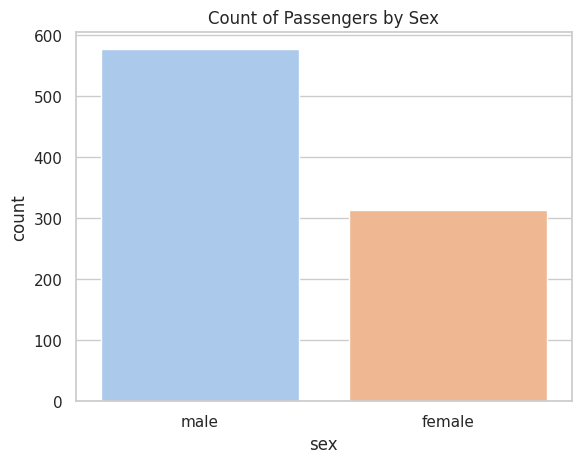

<ipython-input-15-386466886>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=titanic_data_filled, palette='Set2')


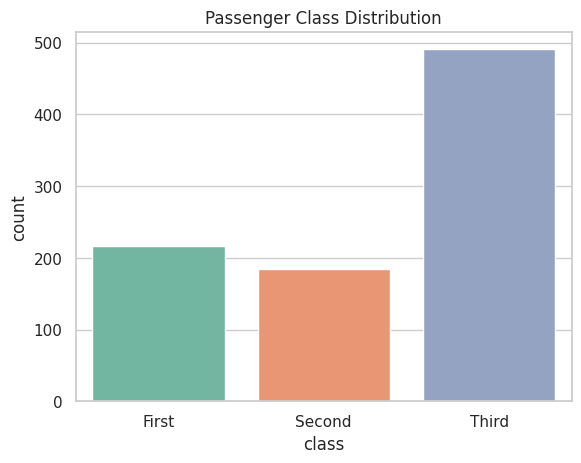

<ipython-input-15-386466886>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='embarked', data=titanic_data_filled, palette='Set3')


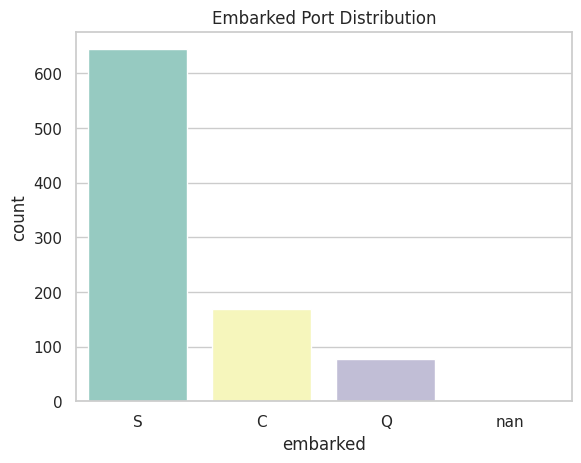

<ipython-input-15-386466886>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='survived', data=titanic_data_filled, palette='coolwarm')


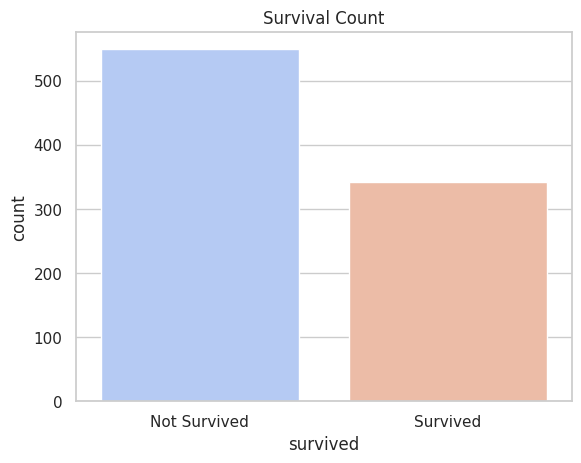

<ipython-input-15-386466886>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='deck', data=titanic_data_filled, order=sorted(titanic_data_filled['deck'].unique()), palette='muted')


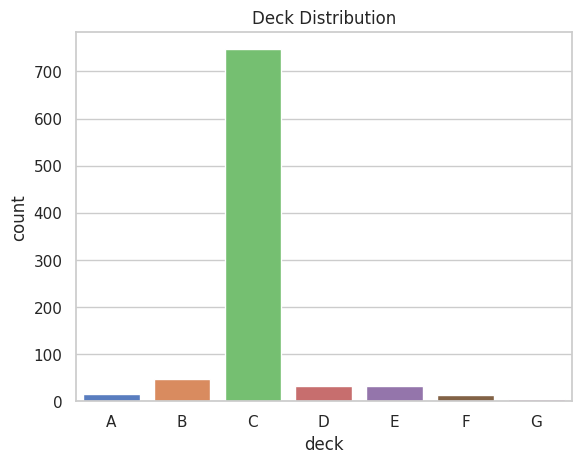

<ipython-input-15-386466886>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='alone', data=titanic_data_filled, palette='husl')


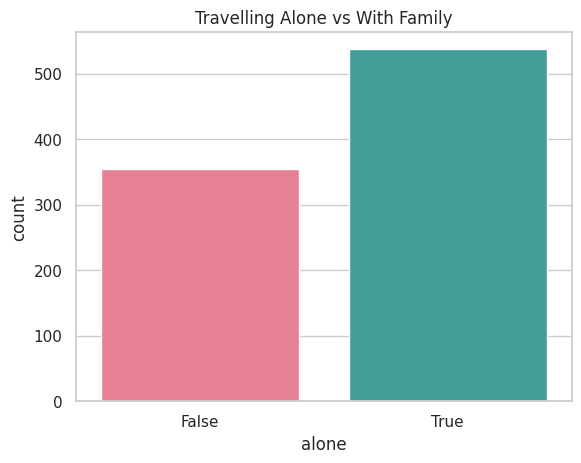

In [15]:
# 2. Categorical Features

# Sex
sns.countplot(x='sex', data=titanic_data_filled, palette='pastel')
plt.title('Count of Passengers by Sex')
plt.show()

# Class
sns.countplot(x='class', data=titanic_data_filled, palette='Set2')
plt.title('Passenger Class Distribution')
plt.show()

# Embarked
sns.countplot(x='embarked', data=titanic_data_filled, palette='Set3')
plt.title('Embarked Port Distribution')
plt.show()

#Survival
sns.countplot(x='survived', data=titanic_data_filled, palette='coolwarm')
plt.title('Survival Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

# Deck
sns.countplot(x='deck', data=titanic_data_filled, order=sorted(titanic_data_filled['deck'].unique()), palette='muted')
plt.title('Deck Distribution')
plt.show()

#Alone vs Not Alone
sns.countplot(x='alone', data=titanic_data_filled, palette='husl')
plt.title('Travelling Alone vs With Family')
plt.show()


Summary of Univariate Observations

1. age: Right-skewed with more passengers in 20–40 age group

2. fare: Strongly right-skewed with many low fares and few high ones

3. sex: More males than females

4. survived: More people died than survived

5. class: Most passengers were in 3rd class

6. embarked: Most boarded from port S (Southampton)

7. deck: Deck B, C, and Unknown are most frequent

8. alone: Most passengers traveled alone

**Bivariate Analysis — Titanic Survival Trends**

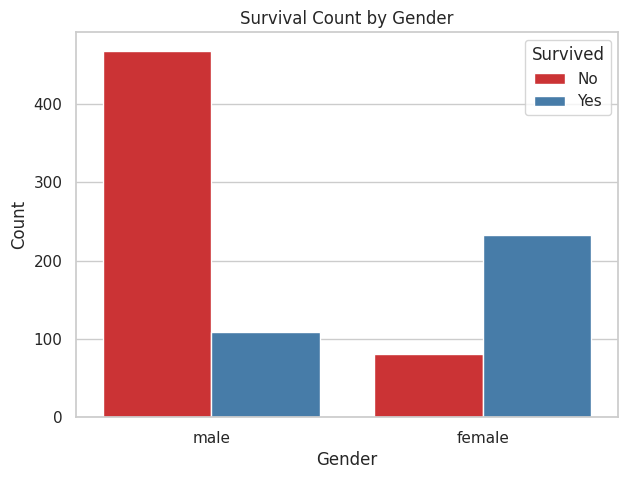

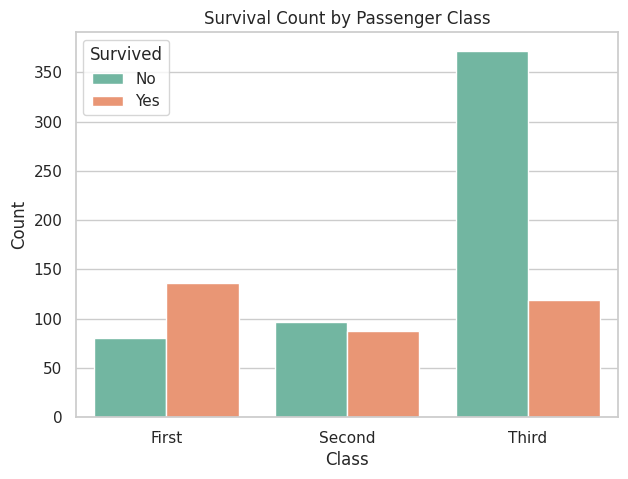

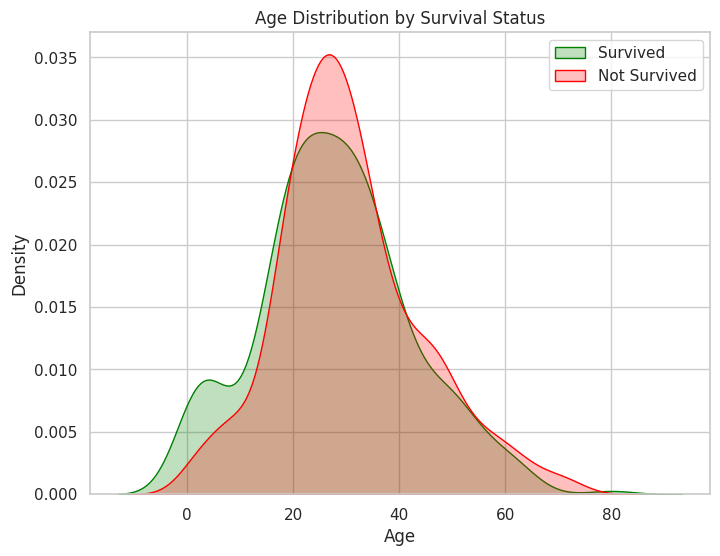

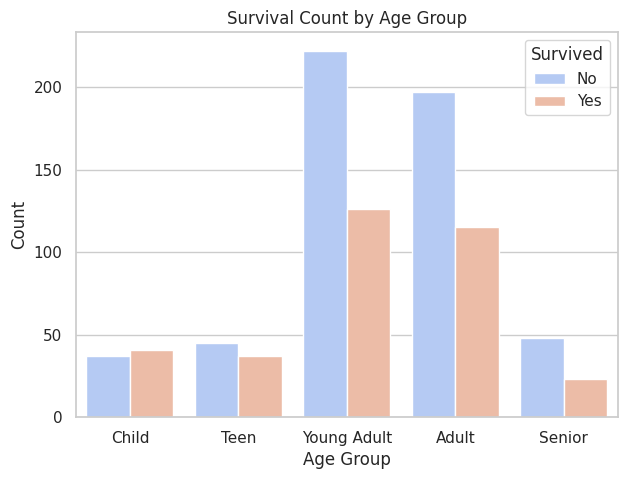

In [16]:
# 1. Survival Based on Gender (sex)
plt.figure(figsize=(7, 5))
sns.countplot(x='sex', hue='survived', data=titanic_data_filled, palette='Set1')
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# 2. Survival Based on Passenger Class (class)
plt.figure(figsize=(7, 5))
sns.countplot(x='class', hue='survived', data=titanic_data_filled, palette='Set2')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# 3. Survival Based on Age
plt.figure(figsize=(8, 6))
sns.kdeplot(data=titanic_data_filled[titanic_data_filled['survived'] == 1]['age'], label='Survived', fill=True, color='green')
sns.kdeplot(data=titanic_data_filled[titanic_data_filled['survived'] == 0]['age'], label='Not Survived', fill=True, color='red')
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

# Create age bins
titanic_data_filled['age_group'] = pd.cut(titanic_data_filled['age'], bins=[0, 12, 18, 30, 50, 80],
                                          labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

plt.figure(figsize=(7, 5))
sns.countplot(x='age_group', hue='survived', data=titanic_data_filled, palette='coolwarm')
plt.title('Survival Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

**Summary of Bivariate Trends**

1. Sex: Females had much higher survival rates than males.
2. Class: 1st class passengers had the highest survival; 3rd class had the lowest.
3. Age: Children and teens were prioritized; seniors had poor survival outcomes.

**Multivariate Survival Analysis**

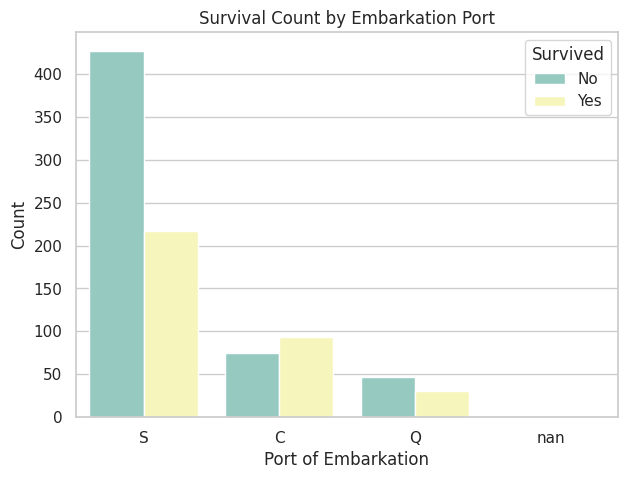

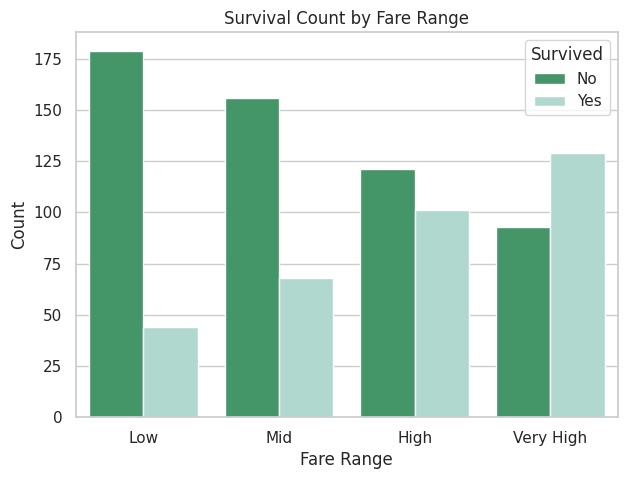

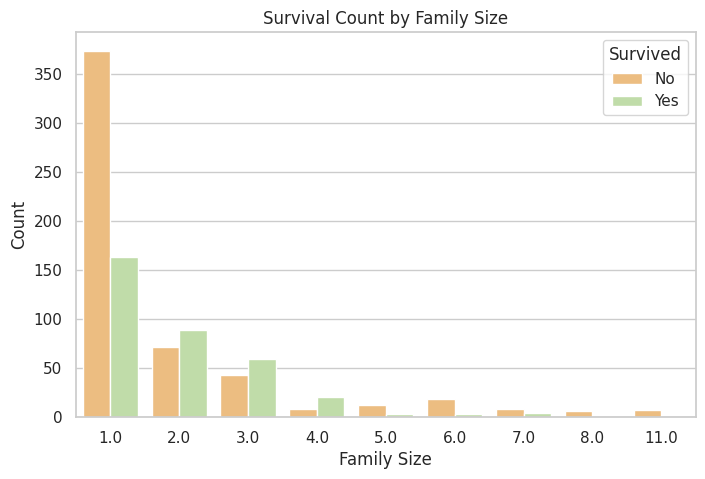

In [17]:
# 1. Survival vs Embarkation Point (embarked)
plt.figure(figsize=(7, 5))
sns.countplot(x='embarked', hue='survived', data=titanic_data_filled, palette='Set3')
plt.title('Survival Count by Embarkation Port')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# 2. Survival vs Fare Ranges
titanic_data_filled['fare_range'] = pd.qcut(titanic_data_filled['fare'], q=4, labels=['Low', 'Mid', 'High', 'Very High'])

plt.figure(figsize=(7, 5))
sns.countplot(x='fare_range', hue='survived', data=titanic_data_filled, palette='BuGn_r')
plt.title('Survival Count by Fare Range')
plt.xlabel('Fare Range')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# 3. Survival vs Family Size
titanic_data_filled['family_size'] = titanic_data_filled['sibsp'] + titanic_data_filled['parch'] + 1  # including self

plt.figure(figsize=(8, 5))
sns.countplot(x='family_size', hue='survived', data=titanic_data_filled, palette='Spectral')
plt.title('Survival Count by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

Summary of Multivariate Survival Trends

1. Embarked: Cherbourg → highest survival rate. Southampton → lowest.

2. Fare: Higher fare → higher survival, linked to class and privilege.

3. Family Size: Moderate-sized families survived more than singles or large families.

**Feature Engineering**

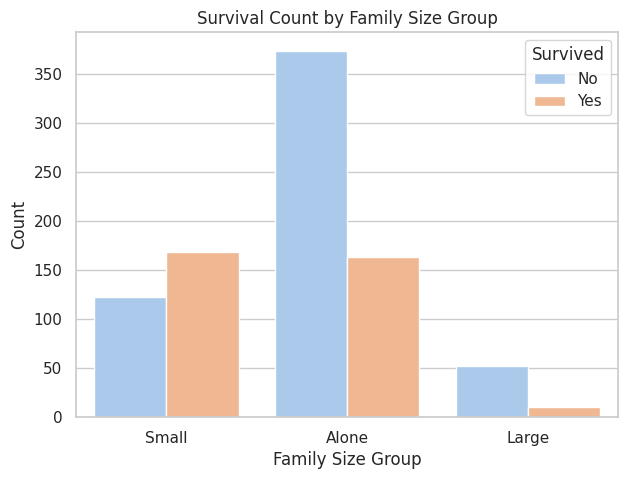

In [18]:
# 1. Family Size
def family_category(size):
    if size == 1:
        return 'Alone'
    elif size <= 4:
        return 'Small'
    else:
        return 'Large'

titanic_data_filled['family_group'] = titanic_data_filled['family_size'].apply(family_category)

plt.figure(figsize=(7, 5))
sns.countplot(x='family_group', hue='survived', data=titanic_data_filled, palette='pastel')
plt.title('Survival Count by Family Size Group')
plt.xlabel('Family Size Group')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


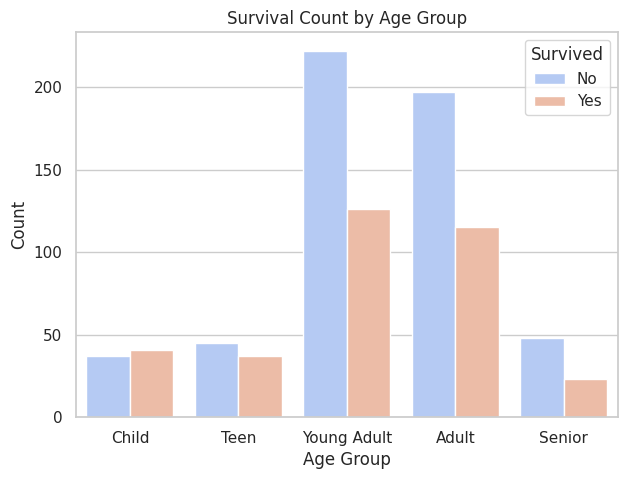

In [19]:
# 2. Age Group
titanic_data_filled['age_group'] = pd.cut(
    titanic_data_filled['age'],
    bins=[0, 12, 18, 30, 50, 80],
    labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
)

plt.figure(figsize=(7, 5))
sns.countplot(x='age_group', hue='survived', data=titanic_data_filled, palette='coolwarm')
plt.title('Survival Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


**Advanced Visualization - Correlation Heatmap**

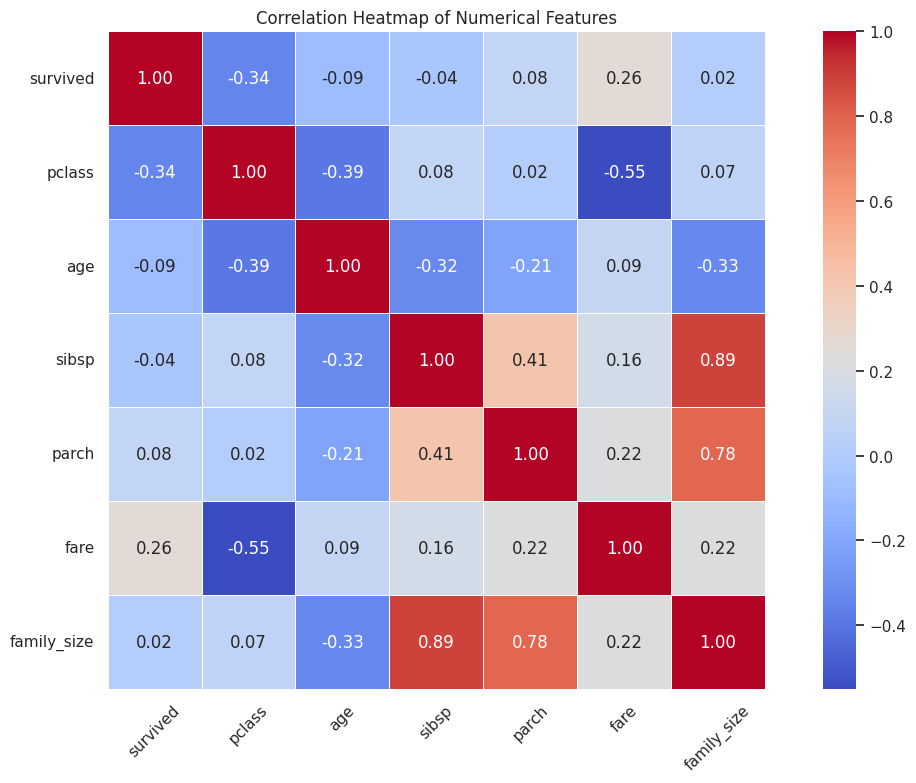

In [20]:
# Select only numerical columns
numeric_features = titanic_data_filled.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_features.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


 **Predictive Modeling**

In [21]:
# Step 1: Prepare the Data for Modeling
# Drop unused or high-cardinality columns
model_data = titanic_data_filled.drop(['deck', 'embark_town', 'who', 'alive', 'class'], axis=1, errors='ignore')

# Drop non-numeric columns or encode them
model_data = pd.get_dummies(model_data, drop_first=True)

# Separate target and features
X = model_data.drop('survived', axis=1)
y = model_data['survived']

# Step 2: Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Step 3: Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print("🔍 Logistic Regression Performance:")
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg):.2f}")

# Step 4: Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Performance:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")

# Step 5: Compare Accuracy
print(f"\nLogistic Regression Accuracy: {accuracy_score(y_test, y_pred_logreg):.2f}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


🔍 Logistic Regression Performance:
[[90 15]
 [20 54]]
              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84       105
         1.0       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

Accuracy: 0.80
Random Forest Performance:
[[89 16]
 [15 59]]
              precision    recall  f1-score   support

         0.0       0.86      0.85      0.85       105
         1.0       0.79      0.80      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

Accuracy: 0.83

Logistic Regression Accuracy: 0.80
Random Forest Accuracy: 0.83


Output:
Logistic Regression provides interpretable results and performs well with linear relationships.

Random Forest often gives higher accuracy, handles feature interactions and non-linearity, and gives feature importances.

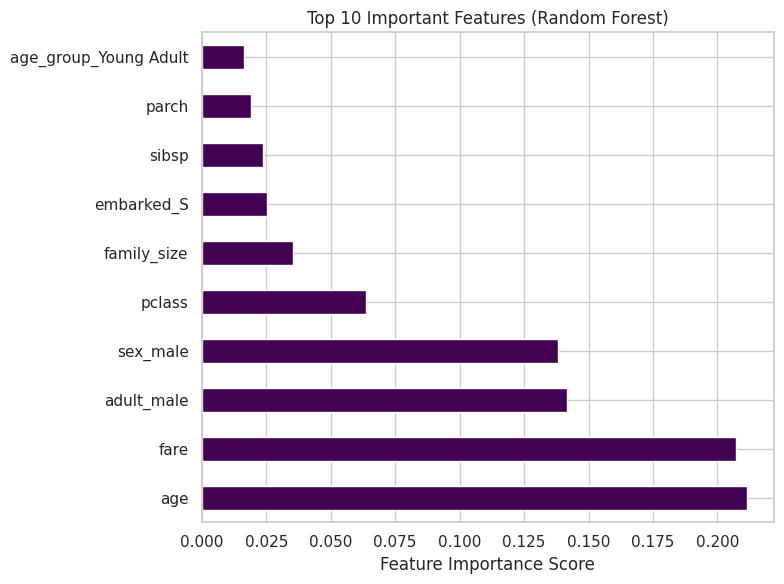

In [22]:
#Feature Importance from Random Forest
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh', colormap='viridis', figsize=(8,6))
plt.title("Top 10 Important Features (Random Forest)")
plt.xlabel("Feature Importance Score")
plt.tight_layout()
plt.show()